                                                Banking Capstone Project
                                                     Submitted by 
                                                     MOHSIN ANWER
                                                   Date: 25-01-2023

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'bank_marketing.csv',sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
#checking for null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#checking for datatypes
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
col=data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


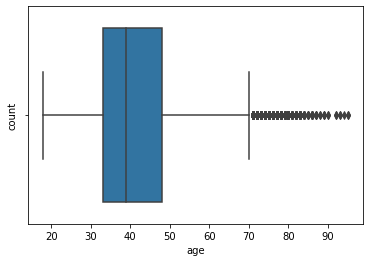

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


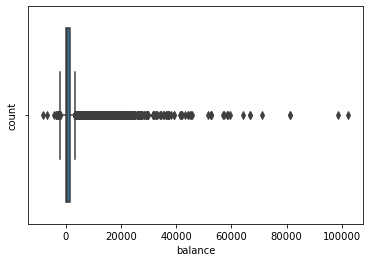

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


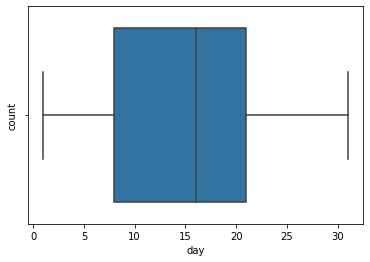

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


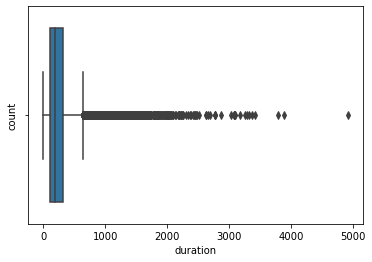

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


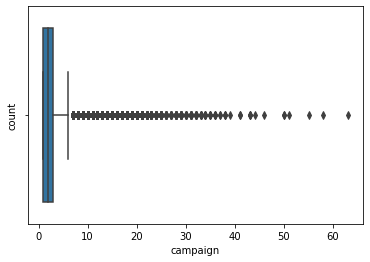

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


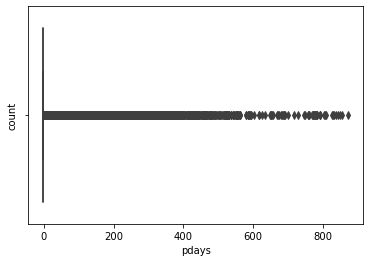

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


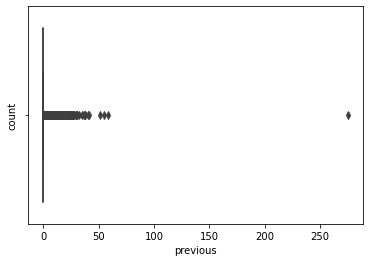

In [9]:
for col_name in col:
    if (data[col_name].dtype=='int64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()     

In [10]:
#handling outliers
col_names=['age','balance','duration','campaign','pdays','previous']
Q1=data.age.quantile(0.25)
Q3=data.age.quantile(0.75)
IQR=Q3-Q1
data=data[(data.age>=Q1-1.5*IQR)&(data.age<=Q3+1.5*IQR)]

Q1=data.balance.quantile(0.25)
Q3=data.balance.quantile(0.75)
IQR=Q3-Q1
data=data[(data.balance>=Q1-1.5*IQR)&(data.balance<=Q3+1.5*IQR)]

Q1=data.duration.quantile(0.25)
Q3=data.duration.quantile(0.75)
IQR=Q3-Q1
data=data[(data.duration>=Q1-1.5*IQR)&(data.duration<=Q3+1.5*IQR)]


Q1=data.campaign.quantile(0.25)
Q3=data.campaign.quantile(0.75)
IQR=Q3-Q1
data=data[(data.campaign>=Q1-1.5*IQR)&(data.campaign<=Q3+1.5*IQR)]

Q1=data.pdays.quantile(0.25)
Q3=data.pdays.quantile(0.75)
IQR=Q3-Q1
data=data[(data.pdays>=Q1-1.5*IQR)&(data.pdays<=Q3+1.5*IQR)]

Q1=data.previous.quantile(0.25)
Q3=data.previous.quantile(0.75)
IQR=Q3-Q1
data=data[(data.previous>=Q1-1.5*IQR)&(data.previous<=Q3+1.5*IQR)]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


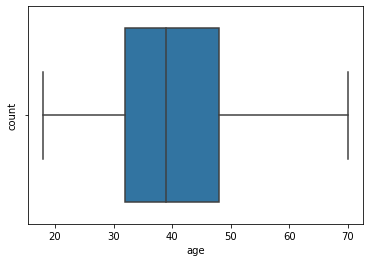

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


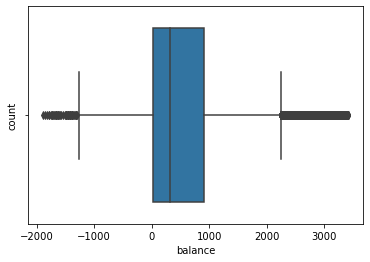

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


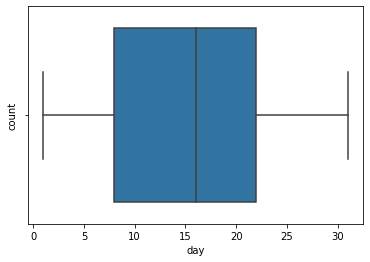

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


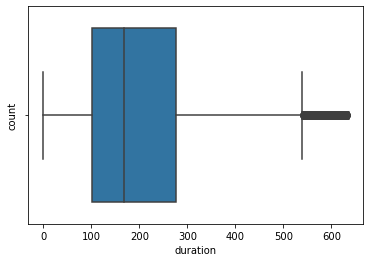

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


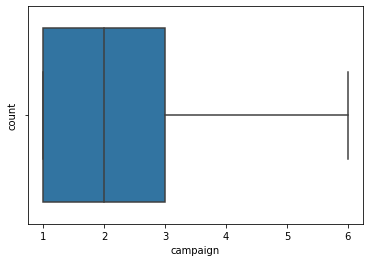

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


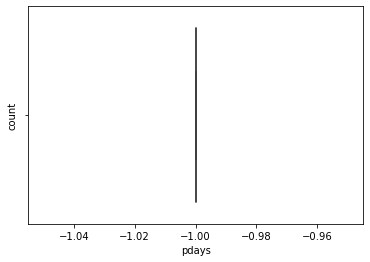

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


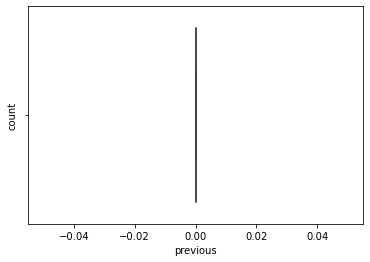

In [11]:
for col_name in col:
    if (data[col_name].dtype=='int64'):
        sns.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()  

In [12]:
#lable encoding
#here we require only categorical features.
col_list=[]
for i in data.columns:
    if (data[i].dtypes=='object'):
        col_list.append(i)

In [13]:
col_list

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in col_list:
    data[i]=le.fit_transform(data[i])

In [15]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,0,0
45202,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,0,1
45203,23,8,2,2,0,113,0,0,0,17,9,266,1,-1,0,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,0,1


In [16]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
X=data[col_list]
vif_data=pd.DataFrame()
vif_data['Feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF
0,job,2.494901
1,marital,3.681564
2,education,3.247075
3,default,1.028221
4,housing,2.537006
5,loan,1.201243
6,contact,2.196540
7,month,5.343986
8,poutcome,NaN
9,y,1.094751


In [18]:
data=data.drop(['poutcome'],axis=1)

In [19]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,37,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,0
45202,34,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,1
45203,23,8,2,2,0,113,0,0,0,17,9,266,1,-1,0,1
45205,25,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,1


In [20]:
data=data.drop(['month'],axis=1)

In [21]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
0,58,4,1,2,0,2143,1,0,2,5,261,1,-1,0,0
1,44,9,2,1,0,29,1,0,2,5,151,1,-1,0,0
2,33,2,1,1,0,2,1,1,2,5,76,1,-1,0,0
3,47,1,1,3,0,1506,1,0,2,5,92,1,-1,0,0
4,33,11,2,3,0,1,0,0,2,5,198,1,-1,0,0


In [22]:
x=data.iloc[:,:-1]
y=data.loc[:,'y']

In [23]:
#creating a classification model using machine learning algorithm like logistic regression,decision tree,random forest etc
#Logistic Regression

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.75,random_state=0)

In [25]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7017, 14)
(21052, 14)
(7017,)
(21052,)


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression()

In [28]:
lr.fit(x_train,y_train)

C:\Users\pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
prediction = lr.predict(x_test)

In [30]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [32]:
print(accuracy_score(y_test,prediction))
print(confusion_matrix(y_test,prediction))

0.9427132813984419
[[19796    74]
 [ 1132    50]]


In [33]:
from sklearn.metrics import plot_roc_curve

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


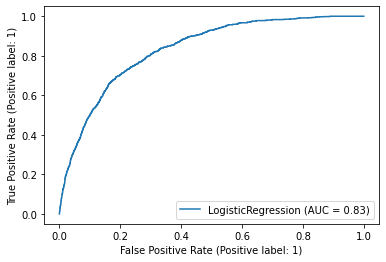

In [34]:
plot_roc_curve(lr,x_test,y_test)

In [35]:
#Decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, StratifiedKFold

In [37]:
rfe = RFE(DecisionTreeClassifier(),  n_features_to_select=6)

In [38]:
rfe.fit(x, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)

In [39]:
rfe.ranking_

array([1, 1, 4, 2, 7, 1, 5, 6, 3, 1, 1, 1, 9, 8])

In [40]:
rfe.get_support()

array([ True,  True, False, False, False,  True, False, False, False,
        True,  True,  True, False, False])

In [41]:
feature_selected = x.columns[rfe.get_support()]

In [42]:
feature_selected

Index(['age', 'job', 'balance', 'day', 'duration', 'campaign'], dtype='object')

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, random_state=0)
x_train = rfe.transform(x_train)
x_test = rfe.transform(x_test)
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [44]:
pred = model.predict(x_test)

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#mean squared error
mse = mean_squared_error(y_test, pred)
print(mse)

0.09939437121482009


In [46]:
#r2 score 
r2 = r2_score(y_test, pred)
print(r2)

-0.7140118261219741


In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [48]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))

[[4989  278]
 [ 280   67]]
0.9006056287851799


In [49]:
#Random forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rt=RandomForestClassifier(n_estimators=10)
rt.fit(x_train,y_train)
y_pred=rt.predict(x_test)

In [51]:
metrics.accuracy_score(y_test, y_pred)

0.9390808692554329

In [52]:
n_estimators = [5,10,15,20,25,30,35,40,45,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt','log2'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(20, 150, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20] # minimum sample number to split a node
min_samples_leaf = [1, 3, 5, 7, 9] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
oob_score = [True, False] # for oob to consider or not

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [53]:
rfc_hyp = RandomForestClassifier()

In [54]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rf_random = RandomizedSearchCV(estimator = rfc_hyp,param_distributions = random_grid,
               n_iter = 100, cv = 20, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(x_train, y_train)

Fitting 20 folds for each of 100 candidates, totalling 2000 fits


In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

In [ ]:
randmf = RandomForestClassifier(n_estimators =25, min_samples_split = 4, min_samples_leaf= 2, max_features = 'auto', max_depth= 10, bootstrap = 'False')
randmf.fit( x_train, y_train)

In [ ]:
y_pred_test = randmf.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_test)